In [12]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pprint import pprint

In [13]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
train_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,61,1,4,138,166,0,2,125,1,3.6,2,1,normal,1
1,58,1,2,120,284,0,2,160,0,1.8,2,0,normal,0
2,57,1,4,110,201,0,0,126,1,1.5,2,0,fixed,0
3,46,0,4,138,243,0,2,152,1,0.0,2,0,normal,0
4,44,1,4,120,169,0,0,144,1,2.8,3,0,fixed,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,53,0,4,130,264,0,2,143,0,0.4,2,0,normal,0
236,54,1,4,122,286,0,2,116,1,3.2,2,2,normal,1
237,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
238,44,1,3,140,235,0,2,180,0,0.0,1,0,normal,0


In [14]:
labelencoder = LabelEncoder()
train_df['thal'] = labelencoder.fit_transform(train_df['thal'])
test_df['thal'] = labelencoder.transform(test_df['thal'])
train_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,61,1,4,138,166,0,2,125,1,3.6,2,1,1,1
1,58,1,2,120,284,0,2,160,0,1.8,2,0,1,0
2,57,1,4,110,201,0,0,126,1,1.5,2,0,0,0
3,46,0,4,138,243,0,2,152,1,0.0,2,0,1,0
4,44,1,4,120,169,0,0,144,1,2.8,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,53,0,4,130,264,0,2,143,0,0.4,2,0,1,0
236,54,1,4,122,286,0,2,116,1,3.2,2,2,1,1
237,67,1,4,160,286,0,2,108,1,1.5,2,3,1,1
238,44,1,3,140,235,0,2,180,0,0.0,1,0,1,0


In [15]:
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=133, shuffle= True)
train_labels = train_data.pop('target')
val_labels = val_data.pop('target')
test_labels = test_df.pop('target')

In [16]:
# train_data.loc[:,['age','trestbps']].describe()
train_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,55.031250,0.687500,3.161458,130.739583,245.479167,0.125000,0.989583,149.218750,0.338542,1.027083,1.604167,0.666667,1.328125
std,9.179368,0.464724,0.986810,17.166719,52.406082,0.331584,0.997324,23.062266,0.474451,1.100878,0.613618,0.905673,0.552615
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,49.000000,0.000000,3.000000,120.000000,209.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,56.500000,1.000000,3.000000,130.000000,235.500000,0.000000,0.500000,154.000000,0.000000,0.800000,2.000000,0.000000,1.000000
75%,62.000000,1.000000,4.000000,140.000000,273.250000,0.000000,2.000000,165.000000,1.000000,1.600000,2.000000,1.000000,2.000000
max,77.000000,1.000000,4.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,3.000000,3.000000,2.000000


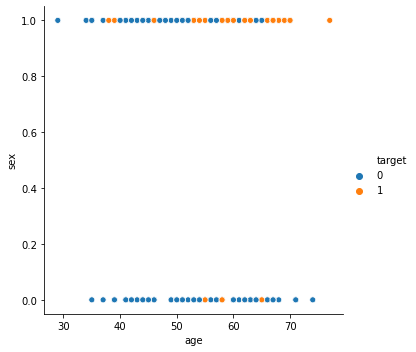

In [17]:
sns.relplot(x = 'age', y = 'sex', hue = 'target', data = train_df)

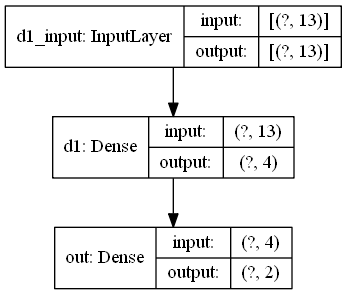

In [19]:
def create_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 4, 
                          activation='relu',
                          use_bias = True,
                          kernel_initializer = 'Ones',
                          bias_initializer='zeros',
                          kernel_regularizer=None, 
                          bias_regularizer=None,
                          activity_regularizer=None, 
                          kernel_constraint=None, 
                          bias_constraint=None,
                          input_shape=(13,), 
                          name = 'd1'),
#     tf.keras.layers.Dense(units = 6, activation='relu', name = 'd2'),
    tf.keras.layers.Dense(units = 2,activation = 'sigmoid', name = 'out')
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def create_model1():
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=(13,)))
    model.add(tf.keras.layers.Dense(units = 6, 
                                    activation='relu', 
                                    name = 'd1'))
    model.add(tf.keras.layers.Dense(units = 2, activation='relu', name = 'd2'))
    model.add(tf.keras.layers.Softmax(name = 'out'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model()
tf.keras.utils.plot_model(model, 'my_first_model.png', show_shapes=True)
# model.summary()

In [20]:
x = tf.ones((240, 13))
y = model(x)
y

<tf.Tensor: shape=(240, 2), dtype=float32, numpy=
array([[9.6170515e-01, 1.8475056e-04],
       [9.6170515e-01, 1.8475056e-04],
       [9.6170515e-01, 1.8475056e-04],
       [9.6170515e-01, 1.8475056e-04],
       [9.6170515e-01, 1.8475056e-04],
       [9.6170515e-01, 1.8475056e-04],
       [9.6170515e-01, 1.8475056e-04],
       [9.6170515e-01, 1.8475056e-04],
       [9.6170515e-01, 1.8475056e-04],
       [9.6170515e-01, 1.8475056e-04],
       [9.6170515e-01, 1.8475056e-04],
       [9.6170515e-01, 1.8475056e-04],
       [9.6170515e-01, 1.8475056e-04],
       [9.6170515e-01, 1.8475056e-04],
       [9.6170515e-01, 1.8475056e-04],
       [9.6170515e-01, 1.8475056e-04],
       [9.6170515e-01, 1.8475056e-04],
       [9.6170515e-01, 1.8475056e-04],
       [9.6170515e-01, 1.8475056e-04],
       [9.6170515e-01, 1.8475056e-04],
       [9.6170515e-01, 1.8475056e-04],
       [9.6170515e-01, 1.8475056e-04],
       [9.6170515e-01, 1.8475056e-04],
       [9.6170515e-01, 1.8475056e-04],
       [9.6170

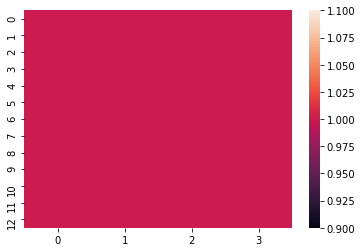

In [9]:
layer1 = model.get_layer(name = 'd1')
sns.heatmap(layer1.weights[0].numpy())

In [10]:
model.save_weights("initials.h5")

In [21]:
model.load_weights("initials.h5")
history = model.fit(
    x = train_data, 
    y = train_labels,
    batch_size = 192,
    epochs = 5,
    verbose = 1,
    callbacks = None,
    validation_data = (val_data, val_labels),
    shuffle = True,
    class_weight = {0:0.5, 1:2}
)

Epoch 1/5
/n#######################/n
Tensor("sequential_2/out/Sigmoid:0", shape=(192, 2), dtype=float32)
/n-----------------------/n
(192, 2)
/n-----------------------/n
Tensor("ExpandDims:0", shape=(192, 1), dtype=int64)
/n-----------------------/n
(192, 1)
/n#######################/n
/n#######################/n
Tensor("sequential_2/out/Sigmoid:0", shape=(192, 2), dtype=float32)
/n-----------------------/n
(192, 2)
/n-----------------------/n
Tensor("ExpandDims:0", shape=(192, 1), dtype=int64)
/n-----------------------/n
(192, 1)
/n#######################/n
1/1 [==============================] - 0s 115ms/step - loss: 0.6227 - accuracy: 0.7344 - val_loss: 0.6931 - val_accuracy: 0.7292
Epoch 2/5
1/1 [==============================] - 0s 38ms/step - loss: 0.6227 - accuracy: 0.7344 - val_loss: 0.6931 - val_accuracy: 0.7292
Epoch 3/5
1/1 [==============================] - 0s 36ms/step - loss: 0.6227 - accuracy: 0.7344 - val_loss: 0.6931 - val_accuracy: 0.7292
Epoch 4/5
1/1 [==============

In [ ]:
# history.history
layer1 = model.get_layer(name = 'd1')
sns.heatmap(layer1.weights[0].numpy())

In [ ]:
test_loss, test_acc = model.evaluate(
    x = val_data, 
    y = val_labels,
    batch_size = 32,
    verbose = 1
)

In [ ]:
predictions_probabilities = model.predict(test_df)
predictions_probabilities

In [ ]:
predictions = tf.math.argmax(predictions_probabilities, 1).numpy()
predictions

In [ ]:
test_labels

In [ ]:
cm = tf.math.confusion_matrix(
    test_labels, predictions,
    num_classes=2).numpy()
cm


In [ ]:
model.save('myfirstmodel.h5')

In [ ]:
del model

In [ ]:
model = tf.keras.models.load_model('myfirstmodel.h5')

In [ ]:
test_loss, test_acc = model.evaluate(
    x = val_data, 
    y = val_labels,
    batch_size = 32,
    verbose = 1
)

In [ ]:
# pprint(model.to_json())
pprint(model.to_yaml())